In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_boston
from sklearn import datasets
from sklearn.model_selection import train_test_split
import math


def linear_predicted(x,w):
  return np.dot(x,w)

def logistic_predicted_sigmoid(x,w):
  return 1/(1+ pow(math.e,-(np.dot(x,w))))
  
def linear_w_update(x,y,alpha,w):

  for j in range(len(w)):
    subtract_part = 0

    for i in range(len(x)):
      subtract_part = subtract_part + (linear_predicted(x[i],w)-y[i])*x[i][j]

    w[j] = w[j] - (alpha*subtract_part)/len(x)

  return w

def logistic_w_update(x,y,alpha,w):

  for j in range(len(w)):
    subtract_part = 0

    for i in range(len(x)):
      subtract_part = subtract_part + (logistic_predicted_sigmoid(x[i],w)-y[i])*x[i][j]*(logistic_predicted_sigmoid(x[i],w))*(1-logistic_predicted_sigmoid(x[i],w))

    w[j] = w[j] - (alpha*subtract_part)/len(x)

  return w



def error_linear(x,y,w):

  J = 0
  for i in range(len(x)):

    J = J + pow((linear_predicted(x[i],w)-y[i]),2)

  J = J/(2*len(x))

  return J

def error_logistic(x,y,w):
  J = 0

  for i in range(len(x)):
    J = J + (y[i]*math.log(logistic_predicted_sigmoid(x[i],w),10)) + ((1-y[i])*math.log(1-logistic_predicted_sigmoid(x[i],w),10))

  J = -J/(len(x))

  return J



def cal_MSE_batch(df,w,alpha,rho,epochs,showPlot):

  a = np.array(df.values)

  x = a[:,0:len(a[0])-1]

  y = a[:,len(a[0])-1]

  J = 0

  prevJ = 0

  itr = 0

  epoch_graph = []
  mse_graph = []

  while True:

    if(itr >= epochs):
      break


    h = []

    

    w = linear_w_update(x,y,alpha,w)
    # w = logistic_w_update(x,y,alpha,w)

    
    J = 0

    J = error_linear(x,y,w)

    # print(J)
    # J = error_logistic(x,y,w)

    mse_graph.append(J)
    epoch_graph.append(itr)


    if(abs(J-prevJ) <= rho):
      break

    prevJ = J
    itr = itr + 1

  

  if(showPlot==1):
    plt.plot(epoch_graph,mse_graph)
    plt.xlabel("EPOCHS")
    # naming the y axis
    plt.ylabel("MSE")
    plt.show()
  return w,J



def cal_MSE_stoch(df,w,alpha,rho,epochs,showPlot):

  a = np.array(df.values)

  x = a[:,0:len(a[0])-1]

  y = a[:,len(a[0])-1]

  J = 0

  prevJ = 0

  itr = 0

  epoch_graph = []
  mse_graph = []

  while True:

    if(itr >= epochs):
      break


    h = []


    for i in range(len(x)):

      # predicted value must be changed
      predicted_value = logistic_predicted_sigmoid(x[i],w)
      # predicted_value = logistic_predicted_sigmoid(x[i],w)
      h.append(predicted_value)

      # gradient
      # J = J + pow(predicted_value - y[i],2)

      # stocastic - logloss
      J = J + (y[i]*math.log(predicted_value,10)) + ((1-y[i])*math.log(1-predicted_value,10))

      for j in range(len(w)):

        # logloss-logistic, gradient-stocastic - MSE
        w[j] = w[j] - alpha*(predicted_value-y[i])*x[i][j]

        # logistic - MSE
        # w[j] = w[j] - alpha*(predicted_value-y[i])*x[i][j]*predicted_value*(1-predicted_value)


    # J = J/(2*len(x))

    J = -J/(len(x))

    

    mse_graph.append(J)
    epoch_graph.append(itr)

    # shuffling.
    df = df.sample(frac = 1)



    if(abs(J-prevJ) <= rho):
      break

    prevJ = J
    itr = itr + 1

  
  # print(mse_graph)
  # print(epoch_graph)

  if(showPlot != ''):
    plt.plot(epoch_graph,mse_graph,label=str(showPlot))
    plt.xlabel("EPOCHS")
    # naming the y axis
    plt.ylabel("MSE")
    plt.legend()
    # plt.show()
  return w,J




def SLP(df,W,alpha,rho,epochs,showPlot):

  a = np.array(df.values)

  X = a[:,0:len(a[0])-1]

  Y = a[:,len(a[0])-1]

  one = 0
  zero = 0
  two = 0

  for f in Y:

    if (f==1):
      one+=1
    elif (f==2):
      two+=1
    else:
      zero+=1
  

  # print('one : ',one)
  # print('two : ',two)
  # print('zero : ', zero)

  # for i in range(len(Y)):
  #   if Y[i]==1:
  #     Y[i] = 2
  #   if Y[i]==2:
  #     Y[i] = 1

  # print(X)
  # print(Y)

  # X input Y output y for one hot encoding
  # one hot encoding
  y = []

  for i in range(len(Y)):
    yi = []
    for j in range(len(classes)):
      if(j==Y[i]):
        yi.append(1)
      else:
        yi.append(0)

    y.append(yi)



  mse_graph = []
  epoch_graph = []

  itr = 1

  prevJ = 0
  while itr <= epochs :

    # df = df.sample(frac = 1)

    a = np.array(df.values)

    X = a[:,0:len(a[0])-1]

    Y = a[:,len(a[0])-1]




    currJ = 0
    for k in range(len(X)) :

      x = X[k]

      d = []

      for w in W:
        d.append(logistic_predicted_sigmoid(x,w))

      sum = 0

      for j in range(len(d)):
        # sum += pow(d[j]-y[k][j],2)
        sum += y[k][j]*math.log(d[j],10) + (1-y[k][j])*math.log(1-d[j],10)
        
      
      # sum /= 2

      currJ += sum


      
      for j in range(len(W)):
        for i in range(len(W[j])):
          W[j][i] = W[j][i] + alpha*(y[k][j] - d[j])*x[i]*d[j]*(1-d[j])

    # currJ = currJ/len(X)
    currJ = -currJ/len(X)

    epoch_graph.append(itr)
    mse_graph.append(currJ)

    # print('currJ : ',currJ)
    # print('prevJ : ', prevJ)

    # print(abs(currJ - prevJ))


    if(abs(currJ - prevJ) < rho):
      break


    prevJ = currJ
    
    itr += 1

  # print(epoch_graph)
  if(showPlot != ''):

    plt.plot(epoch_graph,mse_graph,label=str(showPlot))
    plt.xlabel("EPOCHS")
    # naming the y axis
    plt.ylabel("MSE")
    plt.legend()
    # plt.show()
  
  # print(itr)
  return W,currJ  




def findAccuracy(classes,df,everyClassW,datasetName):

  # Confusion Matrix
  confusionMatrix = np.zeros((len(classes),len(classes)),dtype='int')



  a = np.array(df.values)

  x = a[:,0:len(a[0])-1]

  y = a[:,len(a[0])-1]

  # for i in range(len(y)):
  #   if y[i]==1:
  #     y[i] = 2
  #   if y[i]==2:
  #     y[i] = 1

  


  

  # for each pattern predict H(Xi) for all classes then take max probability

  correctlyPredicted = 0

  for i in range(len(a)):

    predictedForIthPattern = []
    for c in classes:
      predictedForIthPattern.append(logistic_predicted_sigmoid(everyClassW[c],x[i]))
    # print(predictedForIthPattern)

    # predicting the class.
    predictedClass = predictedForIthPattern.index(max(predictedForIthPattern))


    confusionMatrix[predictedClass][int(y[i])] += 1

    if(predictedClass == y[i]):
      correctlyPredicted += 1

  print('Correctly Predicted : ',correctlyPredicted)
  print('Total '+ datasetName +  ' Samples : ', len(a))
  print(datasetName + ' Accuracy : ',(correctlyPredicted*100)/len(a))

  print()
  print('confusionMatrix :' )
  print(confusionMatrix)
  print()




  for i in range(len(confusionMatrix)):
    print('precision for ',i,' class : ',confusionMatrix[i][i]/(sum(confusionMatrix[i])))

  print()

  colWiseSum_ConfusionMatrix = np.sum(confusionMatrix,axis=0)
  for i in range(len(colWiseSum_ConfusionMatrix)):
    print('recall for ',i,' class : ',confusionMatrix[i][i]/(colWiseSum_ConfusionMatrix[i]))

  
  print('\n\n')

  return (correctlyPredicted*100)/len(a)



  
      



97
27
54
[0 1 2]
3
TRAIN SET : 

Correctly Predicted :  63
Total TrainSet Samples :  97
TrainSet Accuracy :  64.94845360824742

confusionMatrix :
[[30  4  5]
 [ 1 33 24]
 [ 0  0  0]]

precision for  0  class :  0.7692307692307693
precision for  1  class :  0.5689655172413793
precision for  2  class :  nan

recall for  0  class :  0.967741935483871
recall for  1  class :  0.8918918918918919
recall for  2  class :  0.0




TEST SET : 

Correctly Predicted :  39
Total TestSet Samples :  54
TestSet Accuracy :  72.22222222222223

confusionMatrix :
[[19  2  4]
 [ 1 20  8]
 [ 0  0  0]]

precision for  0  class :  0.76
precision for  1  class :  0.6896551724137931
precision for  2  class :  nan

recall for  0  class :  0.95
recall for  1  class :  0.9090909090909091
recall for  2  class :  0.0





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:401: RuntimeWarning: invalid value encountered in long_scalars


72.22222222222223

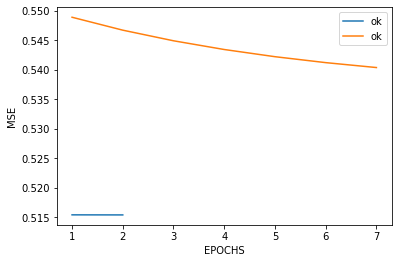

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_boston
from sklearn import datasets
from sklearn.model_selection import train_test_split
import math



'''
PRE-PROCCESSING STARTS
'''



data = pd.DataFrame((datasets.load_wine()).data)
target = pd.DataFrame((datasets.load_wine()).target)


df = data;
df = df/(df.max().max())
df.insert(loc=len(df.columns),column = 'last',value=target)
df.insert(loc=0,column='-1',value=[1 for i in range(len(df))])

# shuffling DataFrame

df = df.sample(frac = 1)

'''

for binary classification
df = df[df['last']!=2]

'''
# df = df[df['last']!=2]

# print(df)

# print(df)

# split the dataset in x:y:z

x = 55
y = 15
z = 30
train_set, reamining_set = train_test_split(df,train_size = x/100)
validation_set, test_set = train_test_split(reamining_set,train_size = y/(y+z))
print(len(train_set))
print(len(validation_set))
print(len(test_set))







alphaarr = np.array([0.1,0.001,0.1,0.03,0.15])
rhoarr = np.array([0.0001,0.011,0,0.001,0.0001])
epocharr = np.array([100,200,1000,400,500])


# df,w,alpha,rho,epochs


'''
PRE-PROCCESSING ENDS
'''




classes = np.unique(np.array(list(df['last'])))

print(classes)


intialW = [random.uniform(-0.3,0.3) for i in range(len(df.columns)-1)]




W = [intialW.copy() for i in range(len(classes)) ]











bestHPIndex = 0
minLoss = math.inf
for i in range(len(epocharr)):
  returnedW, J = SLP(validation_set,W.copy(),alphaarr[i],rhoarr[i],epocharr[i],'')
  if(minLoss > J):
    minLoss = J
    bestHPIndex = i
  # print(J)
      




returnedW,J = SLP(validation_set,W.copy(),alphaarr[bestHPIndex],rhoarr[bestHPIndex],epocharr[bestHPIndex],'ok')
returnedW,J = SLP(train_set,W.copy(),alphaarr[bestHPIndex],rhoarr[bestHPIndex],epocharr[bestHPIndex],'ok')

print(bestHPIndex)

print('TRAIN SET : \n')
findAccuracy(classes,train_set,returnedW.copy(),'TrainSet')

print('\nTEST SET : \n')
findAccuracy(classes,test_set,returnedW.copy(),'TestSet')


  








# print(train_set)

# print(test_set)







 

  


   


     -1         0         1         2  ...        10        11        12  last
27    1  0.007917  0.001024  0.001274  ...  0.000607  0.001649  0.764881     0
123   1  0.007768  0.003452  0.001268  ...  0.000435  0.001845  0.226190     1
36    1  0.007905  0.000976  0.001690  ...  0.000649  0.001655  0.523810     0
128   1  0.007363  0.000970  0.001369  ...  0.000530  0.001655  0.203571     1
88    1  0.006929  0.001226  0.001464  ...  0.000595  0.001637  0.404762     1
..   ..       ...       ...       ...  ...       ...       ...       ...   ...
96    1  0.007030  0.001262  0.001631  ...  0.000565  0.001345  0.372024     1
81    1  0.007571  0.001077  0.001310  ...  0.000690  0.001869  0.425000     1
149   1  0.007786  0.002321  0.001405  ...  0.000339  0.000792  0.327381     2
111   1  0.007452  0.001446  0.001292  ...  0.000536  0.001655  0.193452     1
175   1  0.007899  0.002548  0.001345  ...  0.000351  0.000929  0.497024     2

[178 rows x 15 columns]
FOLD :  1
Correctly Predict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:401: RuntimeWarning: invalid value encountered in long_scalars


Correctly Predicted :  30
Total testSet Samples :  35
testSet Accuracy :  85.71428571428571

confusionMatrix :
[[14  1  0]
 [ 1 16  3]
 [ 0  0  0]]

precision for  0  class :  0.9333333333333333
precision for  1  class :  0.8
precision for  2  class :  nan

recall for  0  class :  0.9333333333333333
recall for  1  class :  0.9411764705882353
recall for  2  class :  0.0



--------------
FOLD :  5
Correctly Predicted :  25
Total testSet Samples :  35
testSet Accuracy :  71.42857142857143

confusionMatrix :
[[11  0  2]
 [ 1 14  7]
 [ 0  0  0]]

precision for  0  class :  0.8461538461538461
precision for  1  class :  0.6363636363636364
precision for  2  class :  nan

recall for  0  class :  0.9166666666666666
recall for  1  class :  1.0
recall for  2  class :  0.0



--------------
AVG Accuracy :  69.76190476190477


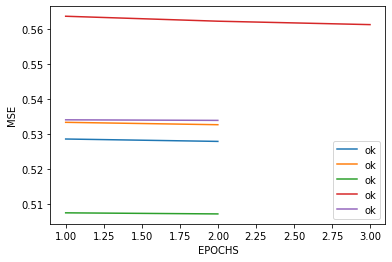

In [3]:
from sklearn.model_selection import KFold

# https://stackoverflow.com/questions/19155718/select-pandas-rows-based-on-list-index
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html


print(df)

kf = KFold(n_splits=5)
kf

avgAccuracy = 0
foldNum = 1
for train_index, test_index in kf.split(np.array(df.values)):

  

  trainDf = df.iloc[train_index]
  testDf = df.iloc[test_index]

  


  print('FOLD : ',foldNum)

  everyClassW,J = SLP(trainDf,W.copy(),alphaarr[bestHPIndex],rhoarr[bestHPIndex],epocharr[bestHPIndex],'ok')
  accuracy = findAccuracy(classes,testDf,everyClassW.copy(),'testSet')
  avgAccuracy += accuracy

  print('--------------')


  foldNum += 1

  

avgAccuracy /= 5

print('AVG Accuracy : ',avgAccuracy)


